In [1]:
%matplotlib notebook
from IPython.display import display
from IPython.html import widgets
from scripts.summary_plot import *
from scripts.average_plot import *
from scripts.export_data import *

C:\Program Files\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Program Files\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# file_directory = "C:\Users\hanr\GitHub\SGM-Beamline\data\spectra_example.dat"
# print file_directory
file_directory = get_abs_path("data/spectra_example.dat")
print file_directory
opened_file = open_spec_data_file(file_directory)

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.dat


In [3]:
scan_num_array = get_all_scan_num(opened_file)
print scan_num_array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Input bad scan numbers for example:     2, 5, 8

In [4]:
inputText = widgets.Text() 
def generate_array(sender):
	print inputText.value
inputText.on_submit(generate_array)
inputText

In [5]:
bad_scan = inputText.value
good_scan = generate_good_scan_array(scan_num_array, bad_scan)

These are the original scan numbers:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



## Create bins, assign data points & calculate the average

In [6]:
bins = 600
temp_array = prepare_average_plot (good_scan, opened_file, 690, 750, bins, 50, 80)
mean_energy_array = temp_array[0]
avg_sdd = temp_array[1]
avg_scaler = temp_array[2]
pfy_data = temp_array[3]

Total good scan numbers: 10
Opened all scans.
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed

Start calcualting Average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

G

## Plot Average of SDD in a certain region of interest, I0, TEY & Diode

Plotting average XAS.


<IPython.core.display.Javascript object>


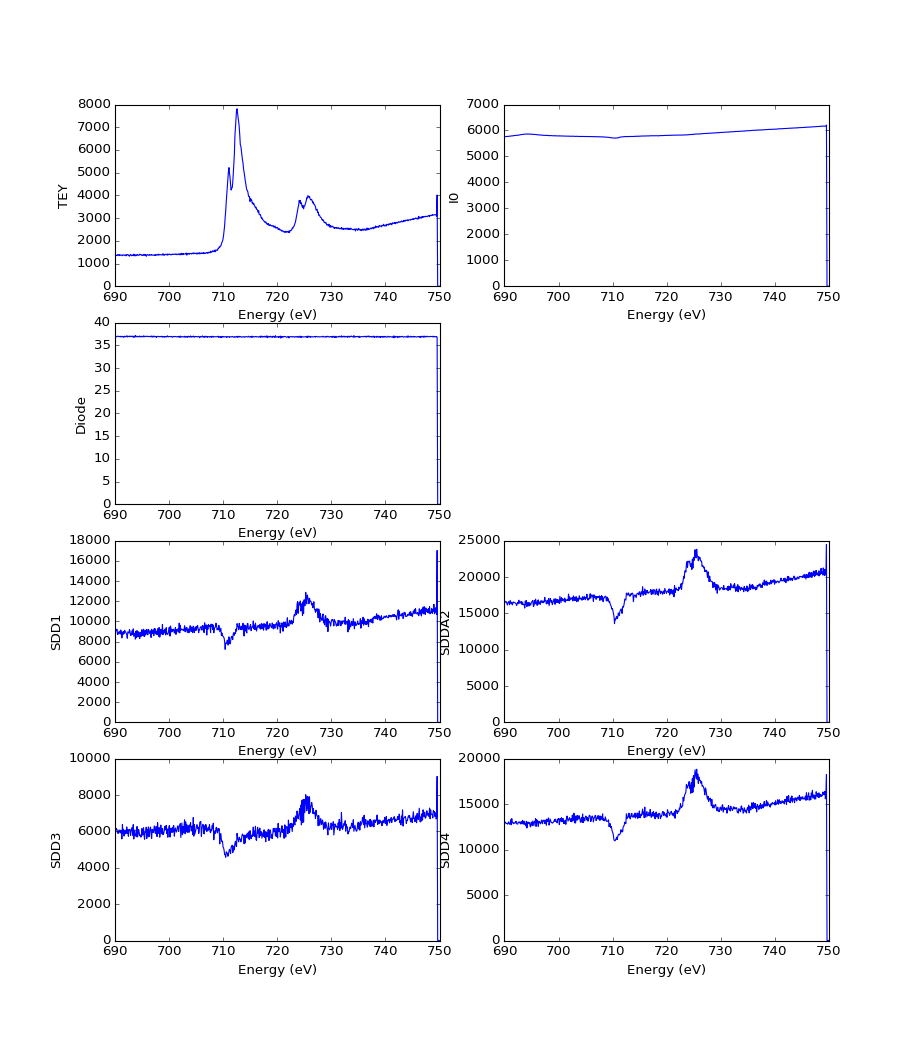

In [7]:
plot_avg_xas_all(mean_energy_array, avg_scaler, pfy_data)

## EEM

Plotting incident v emission energy coordinate based on average of SDD(MCA)


<IPython.core.display.Javascript object>


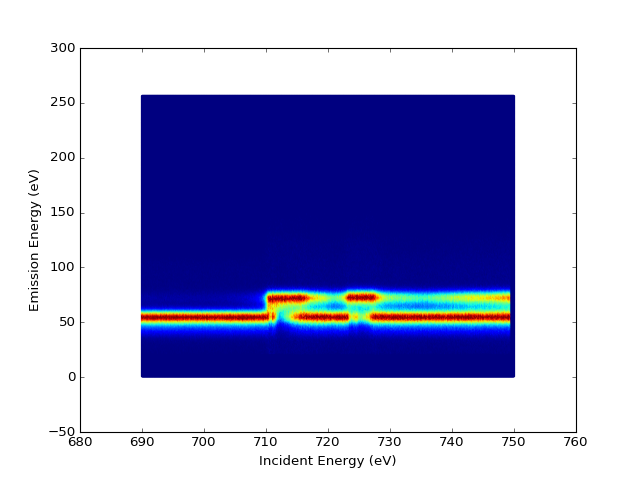

Incident Energy range: 690.05 - 749.95
Incident Energy range: 1 - 256


In [8]:
# plot avg of SDD 1 in color scatter plot
emission_energy_sdd1 = plot_excitation_emission_matrix(mean_energy_array, avg_sdd, "SDD1")

Plotting incident v emission energy coordinate based on average of SDD(MCA)


<IPython.core.display.Javascript object>


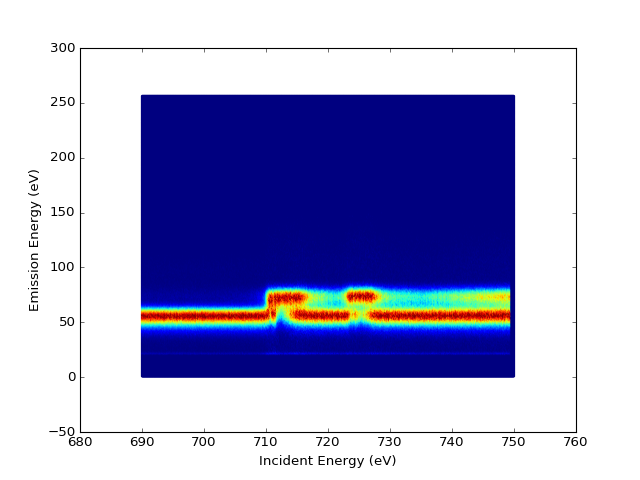

Incident Energy range: 690.05 - 749.95
Incident Energy range: 1 - 256


In [9]:
emission_energy_sdd3 = plot_excitation_emission_matrix(mean_energy_array, avg_sdd, "SDD3")

In [10]:
export_eem("data/output_eem_sdd1.xas", file_directory, mean_energy_array, emission_energy_sdd1, avg_sdd[0], "SDD1")

Sun May 15 11:19:51 2016



## Plot Average of TEY

<IPython.core.display.Javascript object>


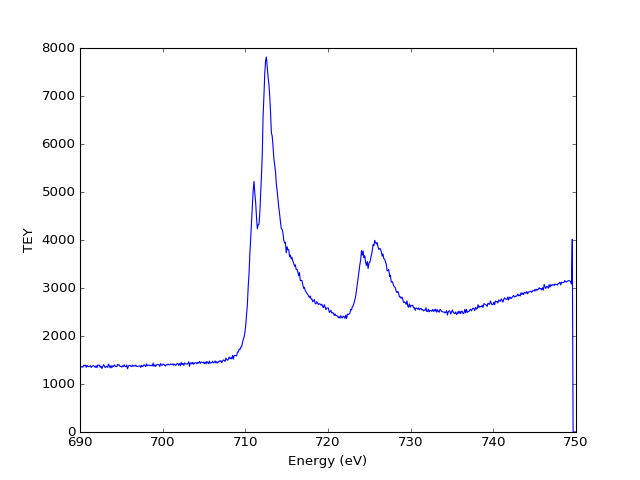

In [11]:
plot_avg_xas(mean_energy_array, "TEY", avg_scaler)

<IPython.core.display.Javascript object>


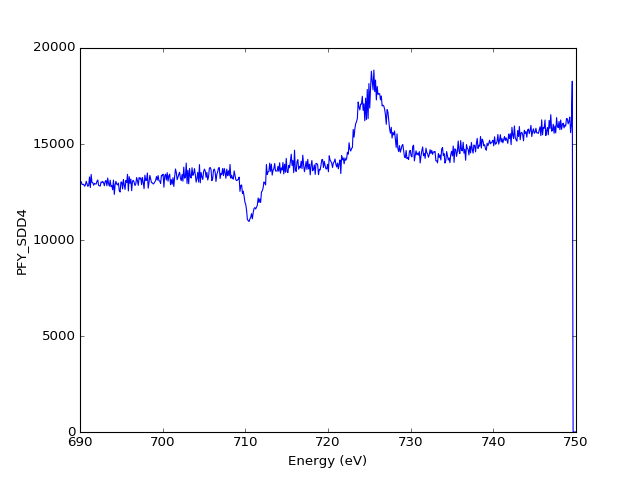

In [12]:
plot_avg_xas(mean_energy_array, "PFY_SDD4", None, pfy_data)

Plotting disivion SDD.


scripts\average_plot.py:384: RuntimeWarning: invalid value encountered in divide
  new_mca_array = np.array(pfy_data[dividend_mca_index]) / np.array(pfy_data[divisor_mca_index])


<IPython.core.display.Javascript object>


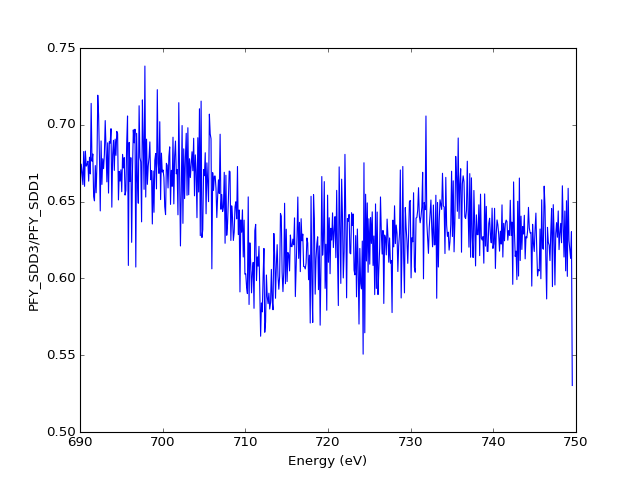

In [13]:
plot_pfy_sdd_division(mean_energy_array, pfy_data,  "PFY_SDD3", "PFY_SDD1")

## Export & Save Data

In [14]:
export_data("data/output_avg_pfy_sdd1.xas" ,file_directory, mean_energy_array, "PFY_SDD1", avg_scaler, pfy_data)

Sun May 15 11:19:51 2016

Export data complete!


In [15]:
export_data("data/output_avg_tey.xas", file_directory, mean_energy_array, " ", avg_scaler, pfy_data)

Unable to export data.
